# Projet 5 : Segmentez des clients d'un site e-commerce

Notre objectif:

- Fournir aux équipes d’e-commerce une segmentation des clients pour les campagnes de communication
- Comprendre les différents types d’utilisateurs
- Fournir une description actionable de la segmentation
- Faire une proposition de contrat de maintenance

## Import et données

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from sklearn.impute import SimpleImputer
from datetime import timedelta
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [2]:
pd.set_option("display.max_rows", 101)
pd.options.display.max_columns = 999

## Lecture des données


In [3]:
# Infos sur la géolocalisation
geo = pd.read_csv( "olist_geolocation_dataset.csv")
# Infos sur les payments
payments = pd.read_csv( "olist_order_payments_dataset.csv")
# Infos sur les achats
orders = pd.read_csv( "olist_orders_dataset.csv")
# Infos sur les produits
products = pd.read_csv("olist_products_dataset.csv")
# Infos sur les vendeurs
sellers = pd.read_csv( "olist_sellers_dataset.csv")
# Infos sur les clients
customers = pd.read_csv( "olist_customers_dataset.csv")
# Infos sur l'évaluation des produits
reviews = pd.read_csv( "olist_order_reviews_dataset.csv")
# Infos sur les items
items = pd.read_csv( "olist_order_items_dataset.csv")
# Infos sur les catégories des produits
category = pd.read_csv( "product_category_name_translation.csv")


# 1. Description et visualisation des données


## 1.1 Données géographiques

### 1.1.1 Apperçu des données


In [4]:
# Apperçu des 5 premières lignes
geo.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [5]:
# Structure des données
geo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [6]:
geo.shape

(1000163, 5)

### 1.1.2 Visualisation géographique


In [7]:
# Removing some outliers
# Brazils most Northern spot is at 5 deg 16′ 27.8″ N latitude
geo = geo[geo.geolocation_lat <= 5.27438888]
# it’s most Western spot is at 73 deg, 58′ 58.19″W Long
geo = geo[geo.geolocation_lng >= -73.98283055]
# It’s most southern spot is at 33 deg, 45′ 04.21″ S Latitude
geo = geo[geo.geolocation_lat >= -33.75116944]
# It’s most Eastern spot is 34 deg, 47′ 35.33″ W Long.
geo = geo[geo.geolocation_lng <= -34.79314722]

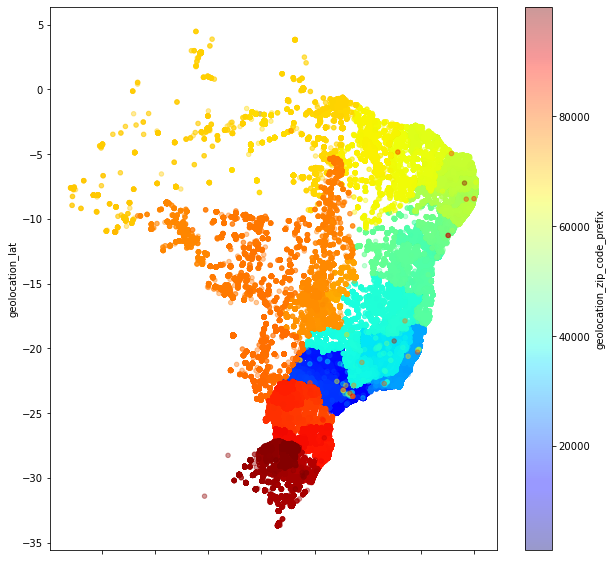

In [8]:
# Affichage graphique des zip_code_prefix,
# des latitudes et longitudes associées
geo.plot(kind="scatter", x="geolocation_lng", y="geolocation_lat",
         alpha=0.4, c="geolocation_zip_code_prefix",
         cmap=plt.get_cmap("jet"), colorbar=True, figsize=(10, 10))
plt.show()

## 1.2 Données sur les payments


### 1.2.1 Apperçu des données

In [9]:
# Apperçu des 5 premières lignes
payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


### 1.2.2 Structure et description des données

In [10]:
# Structure des données
payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [11]:
# Description des données
payments.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


In [12]:
payments.shape

(103886, 5)

### 1.2.3 Analyse graphique des données


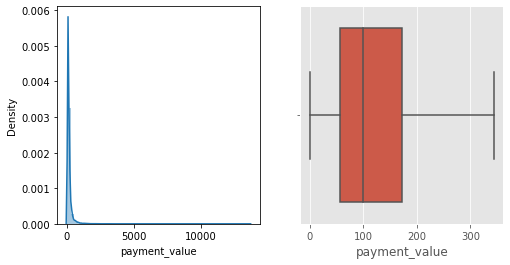

In [13]:
fig = plt.figure(1, figsize=(8, 4))
# Histogramme de "payment_value"
plt.subplot(1, 2, 1)
sns.distplot(payments["payment_value"])
plt.style.use('ggplot')

# Boxplot de "payment_value"
plt.subplot(1, 2, 2)
sns.boxplot(payments["payment_value"], showfliers=False)
plt.show()

Le payement median est de 100 R$


In [14]:
# Nombre de valeurs par type de paiements
payments["payment_type"].value_counts()

credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: payment_type, dtype: int64

Suppresion des payments "not_defined"

In [15]:
# On supprime les paiements de type "not_defined"
payment_type = ["credit_card", "boleto", "voucher", "debit_card"]
payments = payments[payments["payment_type"].isin(payment_type)]

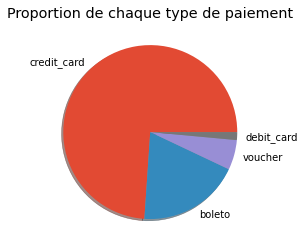

In [16]:
# Pieplot des différents moyens de paiements
plt.title("Proportion de chaque type de paiement")
fig = plt.figure(1, figsize=(8, 8))
plt.pie(payments["payment_type"].value_counts(),
        labels=payments["payment_type"].unique(), shadow=True)
plt.show()

Boxplot des montant des payements en fonction du type de payement



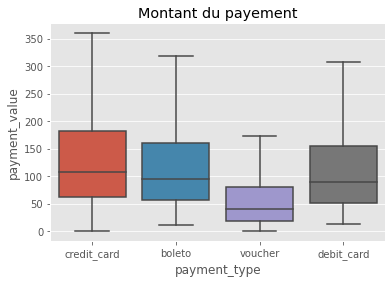

In [17]:
# Boxplot pour chaque type de paiement
plt.title("Montant du payement")
sns.boxplot(data=payments, y="payment_value",
            x="payment_type", showfliers=False)
plt.show()

- Voucher signifie bon d'achats, le payement moyen par ce type de payment est plus faible que les autres

- Boleto est un moyen de payment en espèce

In [18]:
# Nombre moyen de paiements par type de paiement
payments.groupby("payment_type").mean()["payment_installments"]

payment_type
boleto         1.000000
credit_card    3.507155
debit_card     1.000000
voucher        1.000000
Name: payment_installments, dtype: float64

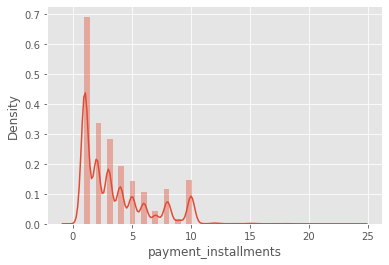

In [19]:
# Densité du nombre de paiements pour
# tous les paiements effectués par carte de crédit
credit_card = payments[payments["payment_type"] == "credit_card"]
sns.distplot(credit_card["payment_installments"])
plt.show()

- Le nombre moyen de payments est majoritairement égale à 1

## 1.3 Données sur les "items"


### 1.3.1 Apperçu des données


In [20]:
# Affichage des 5 premières lignes
items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


### 1.3.2 Structure et description des données

In [21]:
# Structure des données
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [22]:
items.shape

(112650, 7)

In [23]:
# Description des données
items.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


- order_item_id est le nombre d'objets dans une même commande

- f-reight_value est le coût de livraison

- shipping_limit_date correspond à la date d'expédition auprès du transporteur

### 1.3.3 Analyse graphique des données

Nombre d'articles dans une même commande


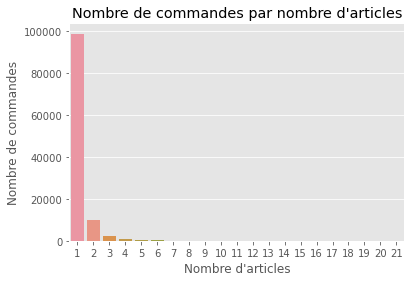

In [24]:
x = list(items["order_item_id"].value_counts().index)
y = items["order_item_id"].value_counts().values

plt.title("Nombre de commandes par nombre d'articles")
plt.xlabel("Nombre d'articles")
plt.ylabel("Nombre de commandes")
sns.barplot(x, y)
plt.show()

- La plus grande majorité des commande comporte un seul article

Prix et coûts de transport des marchandises

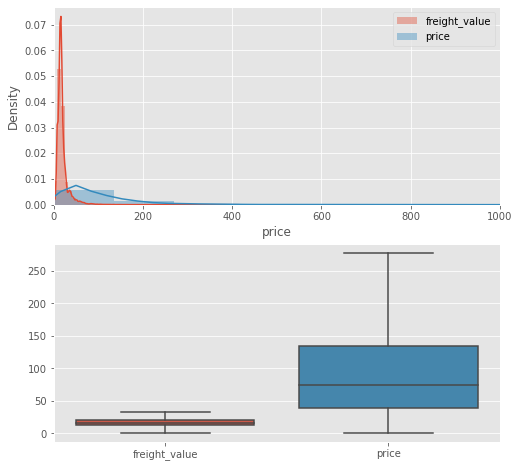

In [25]:
fig = plt.figure(1, figsize=(8, 8))

# Histogramme freight value et prix
plt.subplot(211)
sns.distplot(items["freight_value"], label="freight_value")
sns.distplot(items["price"], label="price")
plt.legend()
# x-axis limits
plt.xlim([0, 1000])

# Boxplot freight value et prix
plt.subplot(212)
sns.boxplot(data=items, order=["freight_value", "price"], showfliers=False)
plt.show()

## 1.4 Données sur les vendeurs

### 1.4.1 Apperçu des données

In [26]:
# Affichage des 5 premières lignes
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [27]:
sellers.shape

(3095, 4)

### 1.4.2 Nombre de villes et d'Etats

In [28]:
# Nombre de villes
number_of_cities = sellers["seller_city"].nunique()
# Nombre d'Etats
number_of_states = sellers["seller_state"].nunique()
print("Le nombre de villes est : {}".format(number_of_cities))
print("Le nombre d'états est : {}".format(number_of_states))

Le nombre de villes est : 611
Le nombre d'états est : 23


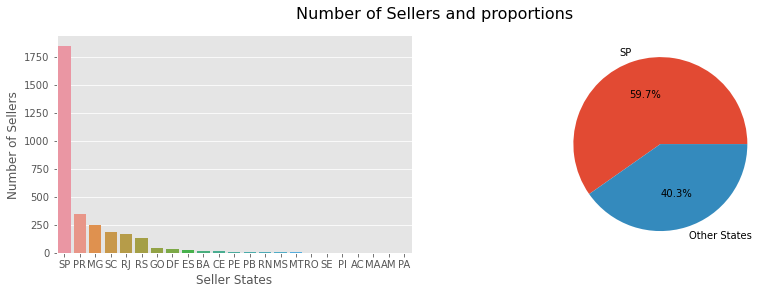

In [29]:
# Affichage graphique du nomnbre de vendeurs dans les différents états
fig = plt.figure(1, figsize=(14, 4))
fig.suptitle("Number of Sellers and proportions", fontsize=16)
plt.subplot(121)
sns.barplot(y=sellers["seller_state"].value_counts(), x=sellers["seller_state"].value_counts().index)
plt.xlabel('Seller States')
plt.ylabel('Number of Sellers')

plt.subplot(122)
prop = sellers["seller_state"].value_counts()["SP"]/len(sellers)
y = [prop, 1 - prop]
plt.pie(y, labels=["SP", "Other States"], autopct='%1.1f%%')
plt.show()

- Il y a une prédominance de vendeurs dans l'état de São Paulo

## 1.5 Données sur les acheteurs

### 1.5.1 Apperçu des données

In [30]:
# Affichage des 5 premières lignes
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [31]:
# Structure des données
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [32]:
customers.shape

(99441, 5)

### 1.5.2 Nombre de villes et d'Etats

In [33]:
# Nombre de villes
number_of_cities = customers["customer_city"].nunique()
# Nombre d'Etats
number_of_states = customers["customer_state"].nunique()
# Nombre de consommateurs
number_of_customers = customers["customer_unique_id"].nunique()

print("Le nombre de villes est : {}".format(number_of_cities))
print("Le nombre d'états est : {}".format(number_of_states))
print("Le nombre de clients est : {}".format(number_of_customers))

Le nombre de villes est : 4119
Le nombre d'états est : 27
Le nombre de clients est : 96096


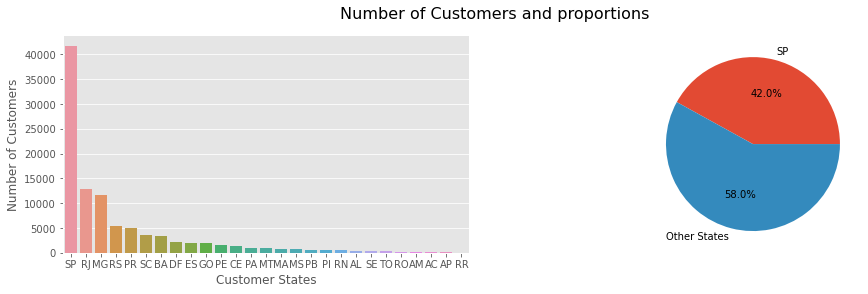

In [34]:
fig = plt.figure(1, figsize=(16, 4))
fig.suptitle("Number of Customers and proportions", fontsize=16)
plt.subplot(121)
sns.barplot(y=customers["customer_state"].value_counts(),
            x=customers["customer_state"].value_counts().index)
plt.xlabel('Customer States')
plt.ylabel('Number of Customers')

plt.subplot(122)
prop = customers["customer_state"].value_counts()["SP"]/len(customers)
y = [prop, 1 - prop]
plt.pie(y, labels=["SP", "Other States"], autopct='%1.1f%%')
plt.show()

- Il y a une prédominance d'acheteurs dans l'état de São Paulo

## 1.6 Données sur les catégories des produits


In [35]:
# Affichage des 5 premières lignes
category.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [36]:
# Structure des données
category.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [37]:
category.shape

(71, 2)

In [38]:
print("Le nombre de catégories est de : {}".format(category["product_category_name_english"].nunique()))

Le nombre de catégories est de : 71


## 1.7 Données sur l'évaluation des produits par les clients

In [39]:
# Affichage des 5 premières lignes
reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [40]:
# Structure des données
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


Visualisation du délai d'évaluation des produits

In [41]:
reviews.shape

(99224, 7)

In [42]:
# Conversion des données dates en datetime
review_answer_timestamp = pd.to_datetime(reviews["review_answer_timestamp"])
review_creation_date = pd.to_datetime(reviews["review_creation_date"])
# Délai d'évaluation des produits
review_answer = review_answer_timestamp - review_creation_date
# Converti en secondes
review_answer = review_answer.dt.total_seconds()/(3600*24)
reviews["Delay_to_answer"] = review_answer

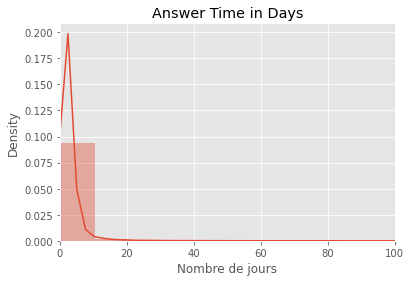

In [43]:
# Histogramme du délai d'évaluation des produits
sns.distplot(review_answer, label="Answer Time")
plt.xlim([0, 100])
plt.xlabel("Nombre de jours")
plt.title("Answer Time in Days")
plt.show()

## 1.8 Données sur les produits

### 1.8.1 Apperçu des données

In [44]:
# Affichage des 5 premières lignes
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [45]:
# Structure des données
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [46]:
products.shape

(32951, 9)

### 1.8.2 Description des variables numériques

In [47]:
# Description des données
products.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


### 1.8.3 Création de la variable volume

In [48]:
# volume = height*lenght*width
products["product_volume_cm3"] = products["product_length_cm"] \
                               * products["product_height_cm"] \
                               * products["product_width_cm"]

### 1.8.4 Affiche de la matrice de corrélation

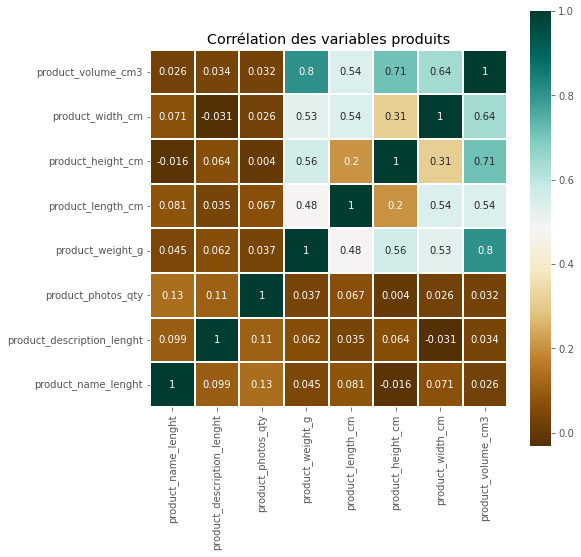

In [49]:
# Matrice de corrélation
matrix_corr = products.corr()
fig = plt.figure(1, figsize=(8, 8))
# Heatmap de la matrice de corrélation
sns.heatmap(matrix_corr, square=True, linewidths=0.1, annot=True,cmap='BrBG')
plt.ylim(0, matrix_corr.shape[0])
plt.title("Corrélation des variables produits")
plt.show()

- Le poids est évidemment corrélé aux dimensions du produit et donc du volume

In [50]:
# Nombre de catégories
print("Le nombre de catégories est : {}"
      .format(products["product_category_name"].nunique()))

Le nombre de catégories est : 73


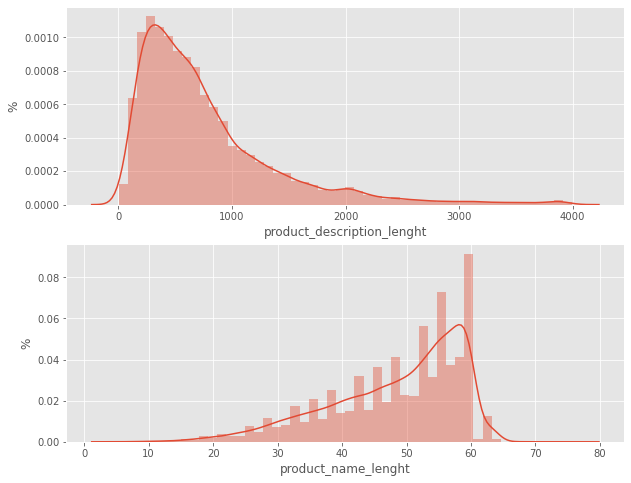

In [51]:
# Longueur de la description des produits
descr_nnull = products[~products["product_description_lenght"].isna()]
fig = plt.figure(1, figsize=(10, 8))
ax1 = fig.add_subplot(211)
sns.distplot(descr_nnull["product_description_lenght"], ax=ax1)
plt.ylabel("%")
# Longueur du nom du produit
ax2 = fig.add_subplot(212)
plt.ylabel("%")
sns.distplot(descr_nnull["product_name_lenght"], ax=ax2)

plt.show()

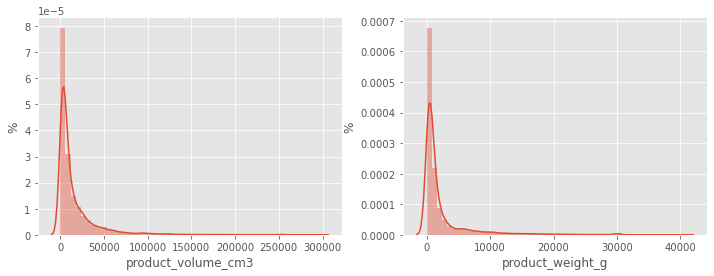

In [52]:
# Grapique histogramme volume et poids des produits
fig = plt.figure(1, figsize=(12, 4))
plt.subplot(121)
plt.ylabel("%")
sns.distplot(products["product_volume_cm3"])
plt.subplot(122)
plt.ylabel("%")
sns.distplot(products["product_weight_g"])
plt.show()

## 1.9 Données sur les achats

### 1.9.1 Apperçu des données

In [53]:
# Affichage des 5 premières lignes
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [54]:
# Affiche la structure du df
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


- order_delivered_carrier_date correspond à la date à laquelle la commande a été remise au transporteur

In [55]:
orders.shape

(99441, 8)

### 1.9.2 Status d'achat

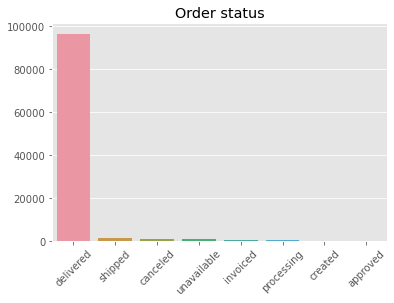

In [56]:
# Nombre de commandes par statuts d'achats
order_status = orders["order_status"].value_counts()
sns.barplot(x=order_status.index, y=order_status.values)
plt.title("Order status")
plt.xticks(rotation=45)
plt.show()

- Suppression des commandes annulés

In [57]:
# Suppression des commandes 'canceled'
orders = orders[orders["order_status"] != "canceled"]

### 1.9.3 Délai de livraison

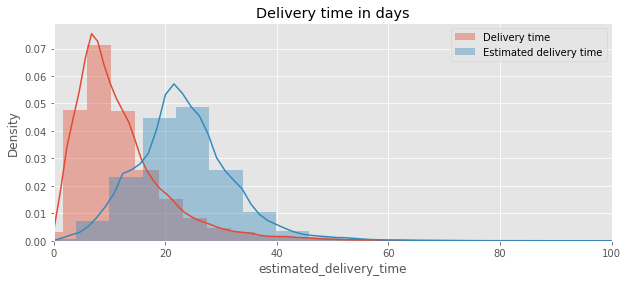

In [58]:
# Conversion des données dates en datetime
orders['order_approved_at'] = pd.to_datetime(
    orders['order_approved_at'])
orders['order_estimated_delivery_date'] = pd.to_datetime(
    orders['order_estimated_delivery_date'])
orders['order_delivered_customer_date'] = pd.to_datetime(
    orders['order_delivered_customer_date'])

# Calculate differences in hours
orders['delivery_time'] = orders['order_delivered_customer_date'] \
                          - orders['order_approved_at']
orders['delivery_time'] = orders['delivery_time'] \
                          .dt.total_seconds() / 86400

orders['estimated_delivery_time'] = orders['order_estimated_delivery_date'] \
                                    - orders['order_approved_at']
orders['estimated_delivery_time'] = orders['estimated_delivery_time'] \
                                    .dt.total_seconds() / 86400

# Delivery estimated time and actual delivery time
plt.figure(figsize=(10, 4))
plt.title("Delivery time in days")
sns.distplot(orders['delivery_time'].dropna(), label='Delivery time')
sns.distplot(orders['estimated_delivery_time']
             .dropna(), label='Estimated delivery time')
plt.legend()
plt.xlim([0, 100])
plt.show()
# Calcul la différence de temps entre
# le délai réel de livraison et le délai estimé
orders['diff_time_delivery'] = orders['delivery_time'] \
                               - orders['estimated_delivery_time']

- Le temps estimé est toujours supérieur au temps de livraison réel

### 1.9.4 Heure, jour de la semaine, mois, et jours du moi, week end

In [59]:
# On s'interesse uniquement à l''heure, le jour, et le mois de l'achat
orders.rename(columns={"order_purchase_timestamp": "purchase_time"},
              inplace=True)
orders["purchase_time"] = orders["purchase_time"].astype('datetime64[ns]')
orders["purchase_hour"] = orders["purchase_time"].map(lambda d: d.hour)
orders["purchase_weekday"] = orders["purchase_time"].map(lambda d: d.dayofweek)
orders["purchase_month"] = orders["purchase_time"].map(lambda d: d.month)
orders["purchase_day"] = orders["purchase_time"].map(lambda d: d.day)
WE = [5, 6]
orders["purchase_week"] = orders["purchase_day"].isin(WE).astype(np.int)

In [60]:
orders["purchase_time"].max()

Timestamp('2018-09-03 09:06:57')

In [61]:
orders["purchase_time"].min()

Timestamp('2016-09-04 21:15:19')

## 1.10 Données sur les catégories

In [62]:
# Affichage des 5 premières ligènes
category.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [63]:
# Structure des données
category.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [64]:
print("Le nombre de catégories est de : {}"
      .format(category["product_category_name_english"].nunique()))


Le nombre de catégories est de : 71


# 2. Concaténation des données et analyse multivariée

## 2.1 Concaténation des données et nettoyage

### 2.1.1 Concaténation des données

In [65]:
# Renommage d'une colonne de sellers
sellers["geolocation_zip_code_prefix"] = sellers["seller_zip_code_prefix"]
# Fusion des dataframes sellers et geo par la colonne "geolocation_zip_code_prefix"
sellers = pd.merge(sellers, geo, how="left",
                   on=["geolocation_zip_code_prefix",
                       "geolocation_zip_code_prefix"])
# Suppression de la colonne 'geolocation_zip_code_prefix'
sellers.drop(columns=["geolocation_zip_code_prefix",
                      "geolocation_city",
                      "geolocation_state",
                      "geolocation_lat",
                      "geolocation_lng"],
             inplace=True)

In [66]:
# Fusion des dataframes orders et reviews par la colonne commune 'order_id'
orders = pd.merge(orders, reviews, how='left', on=['order_id', 'order_id'])
orders = pd.merge(orders, payments, how='left', on=['order_id', 'order_id'])

In [67]:
geo.drop_duplicates(subset=["geolocation_zip_code_prefix"],
                    keep="first", inplace=True)
geo["customer_zip_code_prefix"] = geo["geolocation_zip_code_prefix"]
# Fusion des données clients avec les données géographiques
customers = pd.merge(customers, geo, how='left',
                     on=["customer_zip_code_prefix",
                         "customer_zip_code_prefix"])
customers.drop(columns=["geolocation_zip_code_prefix",
                        "geolocation_lat",
                        "geolocation_lng",
                        "geolocation_city",
                        "geolocation_state"],
               inplace=True)

In [68]:
# Fusion des dataframes orders et customers par la colonne commune 'customer_id'
orders = pd.merge(orders, customers, how="left",
                  on=["customer_id", "customer_id"])
# Fusion des dataframes items et produits par la colonne commune 'product_id'
products = pd.merge(items, products, how='left',
                    on=["product_id", "product_id"])

In [69]:
# Fusion des orders et des produts par la colonne 'order_id'
df_ = pd.merge(orders, products, how='left', on=["order_id", 'order_id'])

In [70]:
# Ajout des catégories à l'ensemble des achats
df = pd.merge(df_, category, how='left', on=["product_category_name",
                                             "product_category_name"])
# Suppresion de la colonne 'product_category_name'
df.drop(columns='product_category_name', inplace=True)

In [71]:
# Renommage de certaines variables
df.rename(columns={"geolocation_lat": "customer_lat",
                   "geolocation_lng": "customer_lng",
                   "product_category_name_english": "product_category_name"},
          inplace=True)

In [72]:
df

,order_id,customer_id,order_status,purchase_time,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,estimated_delivery_time,diff_time_delivery,purchase_hour,purchase_weekday,purchase_month,purchase_day,purchase_week,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,Delay_to_answer,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_volume_cm3,product_category_name
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.429144,15.536632,-7.107488,10,0,10,2,0,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,1.155417,1.0,credit_card,1.0,18.12,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,40.0,268.0,4.0,500.0,19.0,8.0,13.0,1976.0,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.429144,15.536632,-7.107488,10,0,10,2,0,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,1.155417,3.0,voucher,1.0,2.00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,40.0,268.0,4.0,500.0,19.0,8.0,13.0,1976.0,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.429144,15.536632,-7.107488,10,0,10,2,0,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,1.155417,2.0,voucher,1.0,18.59,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,40.0,268.0,4.0,500.0,19.0,8.0,13.0,1976.0,housewares
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,12.502292,17.858021,-5.355729,20,1,7,24,0,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50,0.776273,1.0,boleto,1.0,141.46,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,29.0,178.0,1.0,400.0,19.0,13.0,19.0,4693.0,perfumery
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.382708,26.628206,-17.245498,8,2,8,8,0,e73b67b67587f7644d5bd1a52deb1b01,5.0,NaN,NaN,2018-08-18 00:00:00,2018-08-22 19:07:58,4.797199,1.0,credit_card,3.0,179.12,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,46.0,232.0,1.0,420.0,24.0,19.0,21.0,9576.0,auto
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118388,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018

### 2.1.2 Nettoyage des données

### Proportions de données manquantes

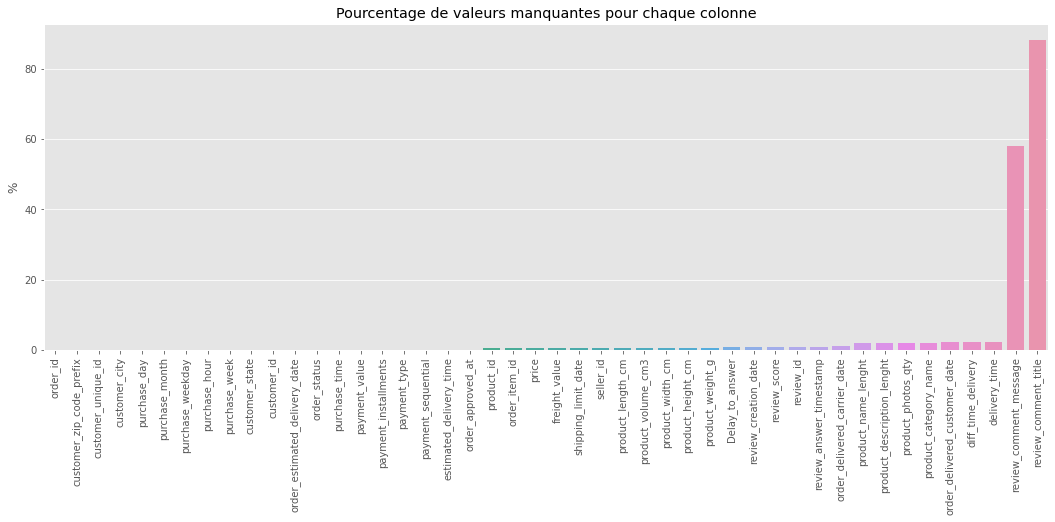

In [73]:
# Calcul des valeurs manquantes
null_prop = df.isna().sum(axis=0).sort_values()/len(df)*100

# Affiche la proportion de données manquants par colonne
fig = plt.figure(figsize=(18, 6))
sns.barplot(x=null_prop.index, y=null_prop.values)
plt.ylabel("%")
plt.title("Pourcentage de valeurs manquantes pour chaque colonne")
plt.style.use('ggplot')
plt.xticks(rotation=90)
plt.show()

### Suppression des colonnes dont les données sont trop fortement manquantes

In [74]:
# Suppression des données dont les proportions renseignés sont <90%
cond = null_prop < 10
cond = cond[cond]
df = df.loc[:, cond.index]

In [75]:
df

,order_id,customer_zip_code_prefix,customer_unique_id,customer_city,purchase_day,purchase_month,purchase_weekday,purchase_hour,purchase_week,customer_state,customer_id,order_estimated_delivery_date,order_status,purchase_time,payment_value,payment_installments,payment_type,payment_sequential,estimated_delivery_time,order_approved_at,product_id,order_item_id,price,freight_value,shipping_limit_date,seller_id,product_length_cm,product_volume_cm3,product_width_cm,product_height_cm,product_weight_g,Delay_to_answer,review_creation_date,review_score,review_id,review_answer_timestamp,order_delivered_carrier_date,product_name_lenght,product_description_lenght,product_photos_qty,product_category_name,order_delivered_customer_date,diff_time_delivery,delivery_time
0,e481f51cbdc54678b7cc49136f2d6af7,3149,7c396fd4830fd04220f754e42b4e5bff,sao paulo,2,10,0,10,0,SP,9ef432eb6251297304e76186b10a928d,2017-10-18,delivered,2017-10-02 10:56:33,18.12,1.0,credit_card,1.0,15.536632,2017-10-02 11:07:15,87285b34884572647811a353c7ac498a,1.0,29.99,8.72,2017-10-06 11:07:15,3504c0cb71d7fa48d967e0e4c94d59d9,19.0,1976.0,13.0,8.0,500.0,1.155417,2017-10-11 00:00:00,4.0,a54f0611adc9ed256b57ede6b6eb5114,2017-10-12 03:43:48,2017-10-04 19:55:00,40.0,268.0,4.0,housewares,2017-10-10 21:25:13,-7.107488,8.429144
1,e481f51cbdc54678b7cc49136f2d6af7,3149,7c396fd4830fd04220f754e42b4e5bff,sao paulo,2,10,0,10,0,SP,9ef432eb6251297304e76186b10a928d,2017-10-18,delivered,2017-10-02 10:56:33,2.00,1.0,voucher,3.0,15.536632,2017-10-02 11:07:15,87285b34884572647811a353c7ac498a,1.0,29.99,8.72,2017-10-06 11:07:15,3504c0cb71d7fa48d967e0e4c94d59d9,19.0,1976.0,13.0,8.0,500.0,1.155417,2017-10-11 00:00:00,4.0,a54f0611adc9ed256b57ede6b6eb5114,2017-10-12 03:43:48,2017-10-04 19:55:00,40.0,268.0,4.0,housewares,2017-10-10 21:25:13,-7.107488,8.429144
2,e481f51cbdc54678b7cc49136f2d6af7,3149,7c396fd4830fd04220f754e42b4e5bff,sao paulo,2,10,0,10,0,SP,9ef432eb6251297304e76186b10a928d,2017-10-18,delivered,2017-10-02 10:56:33,18.59,1.0,voucher,2.0,15.536632,2017-10-02 11:07:15,87285b34884572647811a353c7ac498a,1.0,29.99,8.72,2017-10-06 11:07:15,3504c0cb71d7fa48d967e0e4c94d59d9,19.0,1976.0,13.0,8.0,500.0,1.155417,2017-10-11 00:00:00,4.0,a54f0611adc9ed256b57ede6b6eb5114,2017-10-12 03:43:48,2017-10-04 19:55:00,40.0,268.0,4.0,housewares,2017-10-10 21:25:13,-7.107488,8.429144
3,53cdb2fc8bc7dce0b6741e2150273451,47813,af07308b275d755c9edb36a90c618231,barreiras,24,7,1,20,0,BA,b0830fb4747a6c6d20dea0b8c802d7ef,2018-08-13,delivered,2018-07-24 20:41:37,141.46,1.0,boleto,1.0,17.858021,2018-07-26 03:24:27,595fac2a385ac33a80bd5114aec74eb8,1.0,118.70,22.76,2018-07-30 03:24:27,289cdb325fb7e7f891c38608bf9e0962,19.0,4693.0,19.0,13.0,400.0,0.776273,2018-08-08 00:00:00,4.0,8d5266042046a06655c8db133d120ba5,2018-08-08 18:37:50,2018-07-26 14:31:00,29.0,178.0,1.0,perfumery,2018-08-07 15:27:45,-5.355729,12.502292
4,47770eb9100c2d0c44946d9cf07ec65d,75265,3a653a41f6f9fc3d2a113cf8398680e8,vianopolis,8,8,2,8,0,GO,41ce2a54c0b03bf3443c3d931a367089,2018-09-04,delivered,2018-08-08 08:38:49,179.12,3.0,credit_card,1.0,26.628206,2018-08-08 08:55:23,aa4383b373c6aca5d8797843e5594415,1.0,159.90,19.22,2018-08-13 08:55:23,4869f7a5dfa277a7dca6462dcf3b52b2,24.0,9576.0,21.0,19.0,420.0,4.797199,2018-08-18 00:00:00,5.0,e73b67b67587f7644d5bd1a52deb1b01,2018-08-22 19:07:58,2018-08-08 13:50:00,46.0,232.0,1.0,auto,2018-08-17 18:06:29,-17.245498,9.382708
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118388,63943bddc261676b46f01ca7ac2f7bd8,11722,da62f9e57a76d978d02ab5362c509660,praia grande,6,2,1,12,1,SP,1fca14ff2861355f6e5f14306ff977a7,2018-03-02,delivered,2018-02-06 12:58:58,195.00,3.0,credit_card,1.0,23.450961,2018-02-06 13:10:37,f1d4ce8c6dd66c47bbaa8c6781c2a923,1.0,174.90,20.10,2018-02-12 13:10:37,1f9ab4708f3056ede07124aad39a2554,40.0,16000.0,40.0,10.0,4950.0,1.743067,2018-03-01 00:00:00,4.0,29bb71b2760d0f876dfa178a76bc47

## Remplacement des valeurs datetime

In [76]:
date_columns = ['review_answer_timestamp',
                'review_creation_date',
                'order_delivered_carrier_date',
                'estimated_delivery_time',
                'shipping_limit_date']

In [77]:
df[date_columns] = df[date_columns].astype('datetime64[ns]')

In [78]:
date_columns = list(df.select_dtypes(include='datetime64[ns]').columns)

## Remplacement des valeurs manquantes numériques

In [79]:
# Liste des colonnes numériques
num_columns = list(df.select_dtypes(include='float64').columns)
# Les valeurs manquantes pour chaque colonnes numérique sont remplacés par les moyennes des colonnes
df[num_columns] = SimpleImputer(strategy='mean').fit_transform(df[num_columns])

## Remplacement des valeurs manquantes catégorielles

In [80]:
obj_columns = list(df.select_dtypes(include='object').columns)
cat_columns = []
for col in obj_columns:
    if '_id' not in col:
        cat_columns.append(col)
# Retypage des catégories en 'category'
df[cat_columns] = df[cat_columns].astype('category')


In [81]:
inputer_cat = SimpleImputer(strategy='most_frequent')
df[cat_columns] = inputer_cat.fit_transform(df[cat_columns])

## 2.2 Analyse multivariée

In [82]:
# Affichage des 5 premières lignes
df.head()

,order_id,customer_zip_code_prefix,customer_unique_id,customer_city,purchase_day,purchase_month,purchase_weekday,purchase_hour,purchase_week,customer_state,customer_id,order_estimated_delivery_date,order_status,purchase_time,payment_value,payment_installments,payment_type,payment_sequential,estimated_delivery_time,order_approved_at,product_id,order_item_id,price,freight_value,shipping_limit_date,seller_id,product_length_cm,product_volume_cm3,product_width_cm,product_height_cm,product_weight_g,Delay_to_answer,review_creation_date,review_score,review_id,review_answer_timestamp,order_delivered_carrier_date,product_name_lenght,product_description_lenght,product_photos_qty,product_category_name,order_delivered_customer_date,diff_time_delivery,delivery_time
0,e481f51cbdc54678b7cc49136f2d6af7,3149,7c396fd4830fd04220f754e42b4e5bff,sao paulo,2,10,0,10,0,SP,9ef432eb6251297304e76186b10a928d,2017-10-18,delivered,2017-10-02 10:56:33,18.12,1.0,credit_card,1.0,1970-01-01 00:00:00.000000015,2017-10-02 11:07:15,87285b34884572647811a353c7ac498a,1.0,29.99,8.72,2017-10-06 11:07:15,3504c0cb71d7fa48d967e0e4c94d59d9,19.0,1976.0,13.0,8.0,500.0,1.155417,2017-10-11,4.0,a54f0611adc9ed256b57ede6b6eb5114,2017-10-12 03:43:48,2017-10-04 19:55:00,40.0,268.0,4.0,housewares,2017-10-10 21:25:13,-7.107488,8.429144
1,e481f51cbdc54678b7cc49136f2d6af7,3149,7c396fd4830fd04220f754e42b4e5bff,sao paulo,2,10,0,10,0,SP,9ef432eb6251297304e76186b10a928d,2017-10-18,delivered,2017-10-02 10:56:33,2.00,1.0,voucher,3.0,1970-01-01 00:00:00.000000015,2017-10-02 11:07:15,87285b34884572647811a353c7ac498a,1.0,29.99,8.72,2017-10-06 11:07:15,3504c0cb71d7fa48d967e0e4c94d59d9,19.0,1976.0,13.0,8.0,500.0,1.155417,2017-10-11,4.0,a54f0611adc9ed256b57ede6b6eb5114,2017-10-12 03:43:48,2017-10-04 19:55:00,40.0,268.0,4.0,housewares,2017-10-10 21:25:13,-7.107488,8.429144
2,e481f51cbdc54678b7cc49136f2d6af7,3149,7c396fd4830fd04220f754e42b4e5bff,sao paulo,2,10,0,10,0,SP,9ef432eb6251297304e76186b10a928d,2017-10-18,delivered,2017-10-02 10:56:33,18.59,1.0,voucher,2.0,1970-01-01 00:00:00.000000015,2017-10-02 11:07:15,87285b34884572647811a353c7ac498a,1.0,29.99,8.72,2017-10-06 11:07:15,3504c0cb71d7fa48d967e0e4c94d59d9,19.0,1976.0,13.0,8.0,500.0,1.155417,2017-10-11,4.0,a54f0611adc9ed256b57ede6b6eb5114,2017-10-12 03:43:48,2017-10-04 19:55:00,40.0,268.0,4.0,housewares,2017-10-10 21:25:13,-7.107488,8.429144
3,53cdb2fc8bc7dce0b6741e2150273451,47813,af07308b275d755c9edb36a90c618231,barreiras,24,7,1,20,0,BA,b0830fb4747a6c6d20dea0b8c802d7ef,2018-08-13,delivered,2018-07-24 20:41:37,141.46,1.0,boleto,1.0,1970-01-01 00:00:00.000000017,2018-07-26 03:24:27,595fac2a385ac33a80bd5114aec74eb8,1.0,118.70,22.76,2018-07-30 03:24:27,289cdb325fb7e7f891c38608bf9e0962,19.0,4693.0,19.0,13.0,400.0,0.776273,2018-08-08,4.0,8d5266042046a06655c8db133d120ba5,2018-08-08 18:37:50,2018-07-26 14:31:00,29.0,178.0,1.0,perfumery,2018-08-07 15:27:45,-5.355729,12.502292
4,47770eb9100c2d0c44946d9cf07ec65d,75265,3a653a41f6f9fc3d2a113cf8398680e8,vianopolis,8,8,2,8,0,GO,41ce2a54c0b03bf3443c3d931a367089,2018-09-04,delivered,2018-08-08 08:38:49,179.12,3.0,credit_card,1.0,1970-01-01 00:00:00.000000026,2018-08-08 08:55:23,aa4383b373c6aca5d8797843e5594415,1.0,159.90,19.22,2018-08-13 08:55:23,4869f7a5dfa277a7dca6462dcf3b52b2,24.0,9576.0,21.0,19.0,420.0,4.797199,2018-08-18,5.0,e73b67b67587f7644d5bd1a52deb1b01,2018-08-22 19:07:58,2018-08-08 13:50:00,46.0,232.0,1.0,auto,2018-08-17 18:06:29,-17.245498,9.382708


In [83]:
df.reset_index(drop=True)
print('Le jeu des données compte {} colonnes et {} lignes.'.format(df.shape[1], df.shape[0]))

Le jeu des données compte 44 colonnes et 118393 lignes.


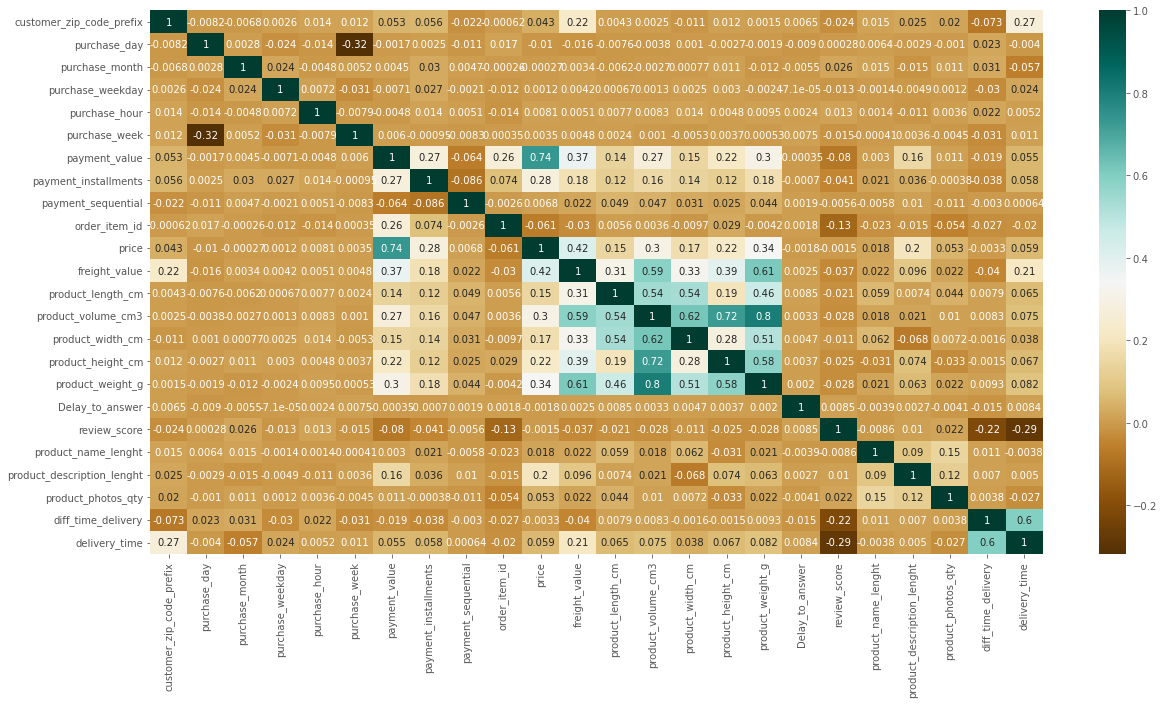

In [84]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True, cmap='BrBG')
plt.show()

### 2.2.1 Montant moyen et nombre de transactions

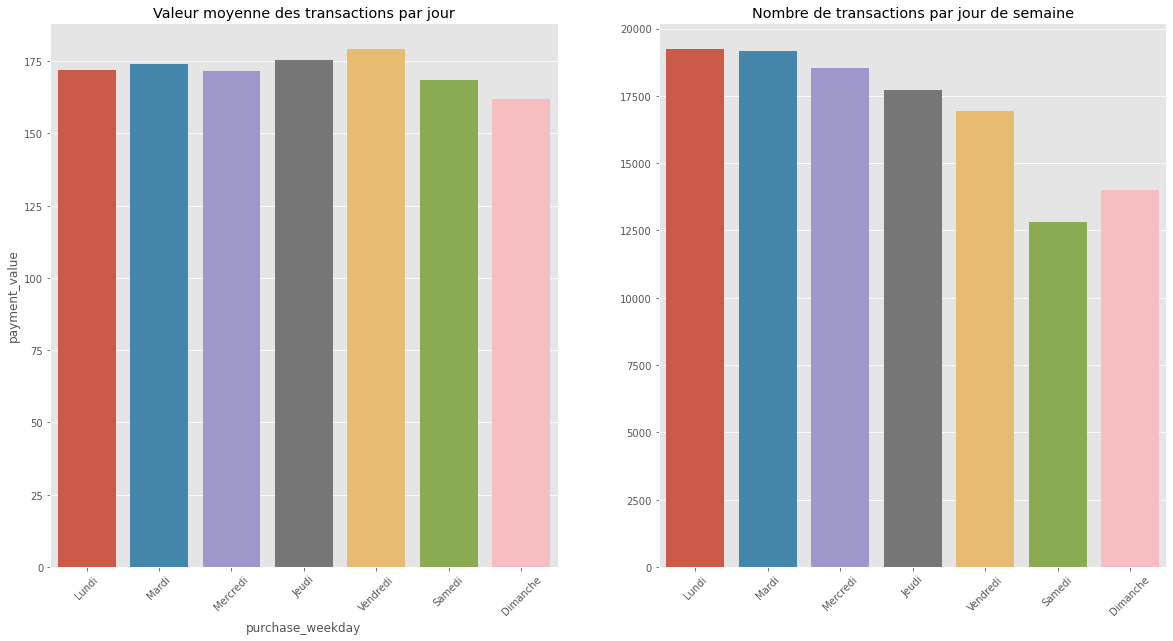

In [85]:
# Les données sont groupés par la variable 'purchase_weekday' et moyennés
payment_value_weekday = df.groupby("purchase_weekday")["payment_value"] \
                .mean().sort_values(ascending=False).reset_index()
order_weekday = df["purchase_weekday"].value_counts().sort_index()

# Jours de la semaine
WEEK = ["Lundi", "Mardi", "Mercredi",
        "Jeudi", "Vendredi", "Samedi", "Dimanche"]

fig = plt.figure(1, figsize=(20, 10))

# Bar plot du montant moyen dépensé pour chaque jour de la semaine
plt.subplot(121)
sns.barplot(data=payment_value_weekday, x="purchase_weekday",
            y="payment_value")
plt.title("Valeur moyenne des transactions par jour")
plt.xticks(np.arange(7), WEEK, rotation=45)

# Bar plot du nombre de transactions pour chaque jour de la semaine
plt.subplot(122)
sns.barplot(x=order_weekday.index, y=order_weekday.values)
plt.xticks(np.arange(7), WEEK, rotation=45)
plt.title("Nombre de transactions par jour de semaine")

plt.show()


- Le week-end il y'a moins d'achats effectués que la semaine

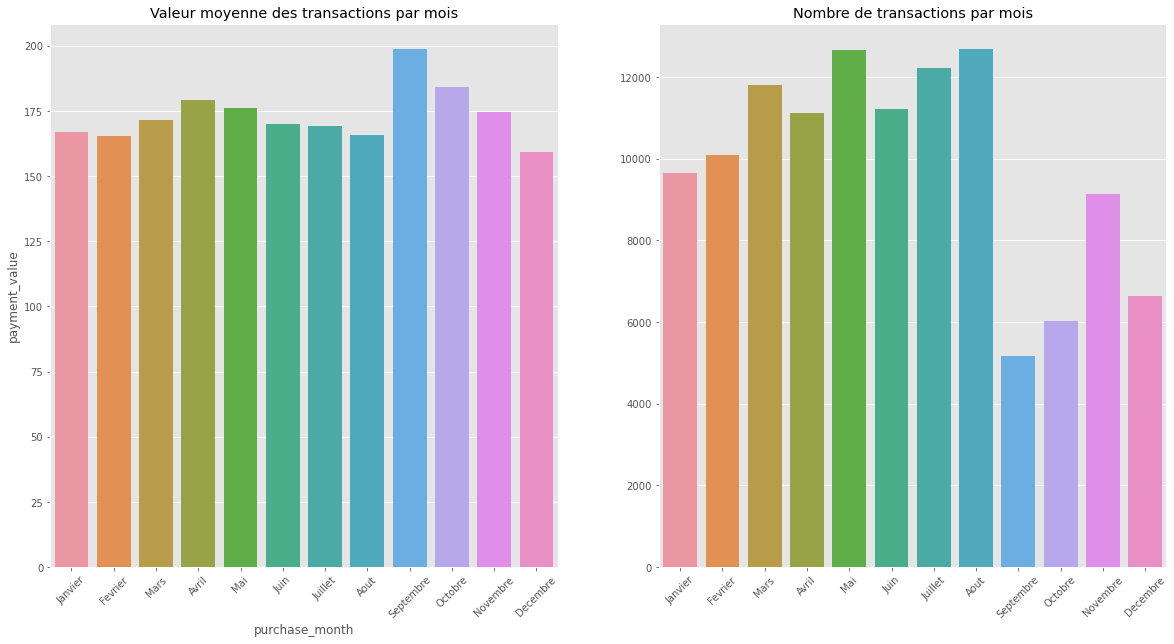

In [86]:
# Mois de l'année
MONTHS = ["Janvier", "Fevrier", "Mars", "Avril",
          "Mai", "Juin", "Juillet", "Aout",
          "Septembre", "Octobre", "Novembre", "Decembre"]

payment_value_month = df.groupby("purchase_month")["payment_value"] \
                    .mean().sort_values(ascending=False).reset_index()
order_month = df["purchase_month"].value_counts().sort_index()

fig = plt.figure(1, figsize=(20, 10))

# Bar plot de montant moyen dépensé pour chaque mois de l'année
plt.subplot(121)
sns.barplot(data=payment_value_month, x="purchase_month",
            y="payment_value")
plt.title("Valeur moyenne des transactions par mois")
plt.xticks(np.arange(12), MONTHS, rotation=45)

# Bar plot du nombre de transactions pour chaque mois de l'année
plt.subplot(122)
sns.barplot(x=order_month.index, y=order_month.values)
plt.xticks(np.arange(12), MONTHS, rotation=45)
plt.title("Nombre de transactions par mois")

plt.show()


- Septembre et Octobre sont des périodes creuses

- A partir de Novembre, les achats de fin d'année reviennent avec les fêtes

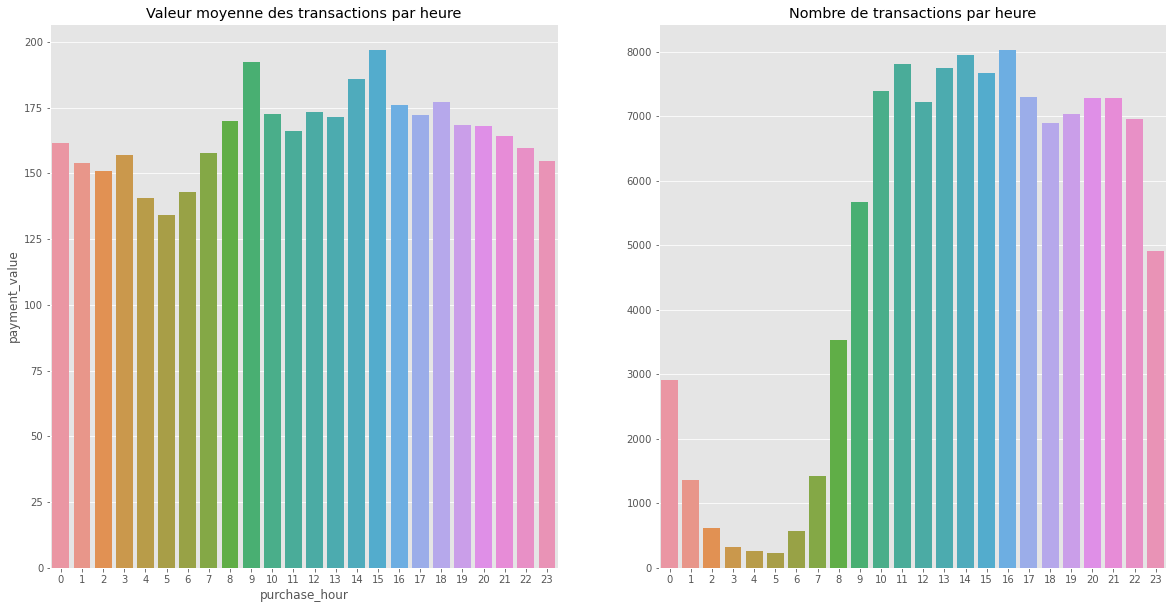

In [87]:
payment_value_hours = df.groupby("purchase_hour")["payment_value"] \
                    .mean().sort_values(ascending=False).reset_index()

order_hours = df["purchase_hour"].value_counts().sort_index()

fig = plt.figure(1, figsize=(20, 10))

# Bar plot du montant moyen dépensé pour chaque heure de la journée
plt.subplot(121)
sns.barplot(data=payment_value_hours, x="purchase_hour",
            y="payment_value")
plt.title("Valeur moyenne des transactions par heure")

# Bar plot du nombre de transactions pour chaque heure de la journée
plt.subplot(122)
sns.barplot(x=order_hours.index, y=order_hours.values)
plt.title("Nombre de transactions par heure")

plt.show()

- Il y a évidemment moins de payements la nuit que le jour

### 2.2.2 Evaluation des produits

In [88]:
df["review_score"].value_counts()

5.000000    66254
4.000000    22292
1.000000    14927
3.000000     9842
2.000000     4101
4.029204      977
Name: review_score, dtype: int64

In [89]:
acceptable_score_list = [1.0, 2.0, 3.0, 4.0, 5.0]

In [90]:
df = df.loc[df['review_score'].isin(acceptable_score_list)]

In [91]:
df['review_score'].value_counts()

5.0    66254
4.0    22292
1.0    14927
3.0     9842
2.0     4101
Name: review_score, dtype: int64

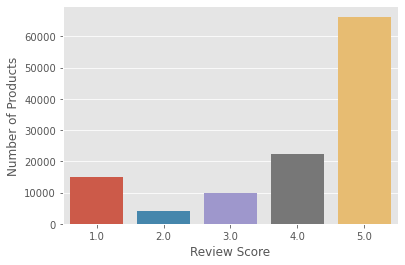

In [92]:
# Nombre de produits pour chaque note
review_score = df["review_score"].value_counts()
# bar plot du nombre de produits pour chaque note de 1 à 5
sns.barplot(review_score.index,review_score.values)
plt.ylabel("Number of Products")
plt.xlabel("Review Score")
plt.show()

- La majorité des produits sont notés 5 sur une échelle de 5

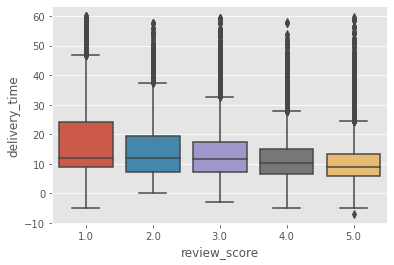

In [93]:
# Boxplot du temps de livraison pour chaque note
sns.boxplot(x="review_score", y="delivery_time",
            data=df[df["delivery_time"] < 60])
plt.show()


- Plus le temps d'attente est faible et plus l'évaluation du produit est bonne

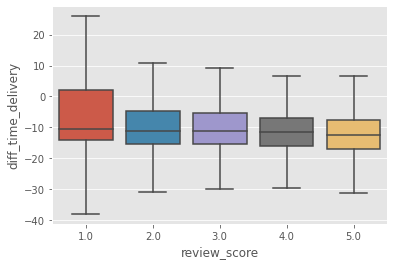

In [94]:
# Boxplot de la différence entre le temps de livraison réelle et estimé, pour chaque note du review score
sns.boxplot(x="review_score", y="diff_time_delivery",
            data=df[df["delivery_time"] < 60], showfliers=False)
plt.show()

- Plus un produit est livré plus tôt que son temps de livraison estimé et plus sa note est élevé

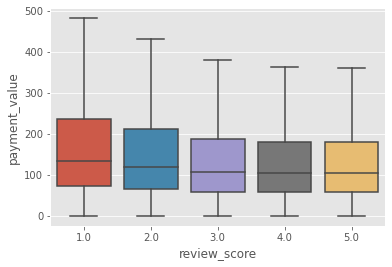

In [95]:
# Boxplot du payement effectué pour chaque note
sns.boxplot(x="review_score", y="payment_value", data=df, showfliers=False)
plt.show()

- Plus le prix de la transaction est faible et plus son évaluation est bonne

### 2.2.3 Catégories des produits

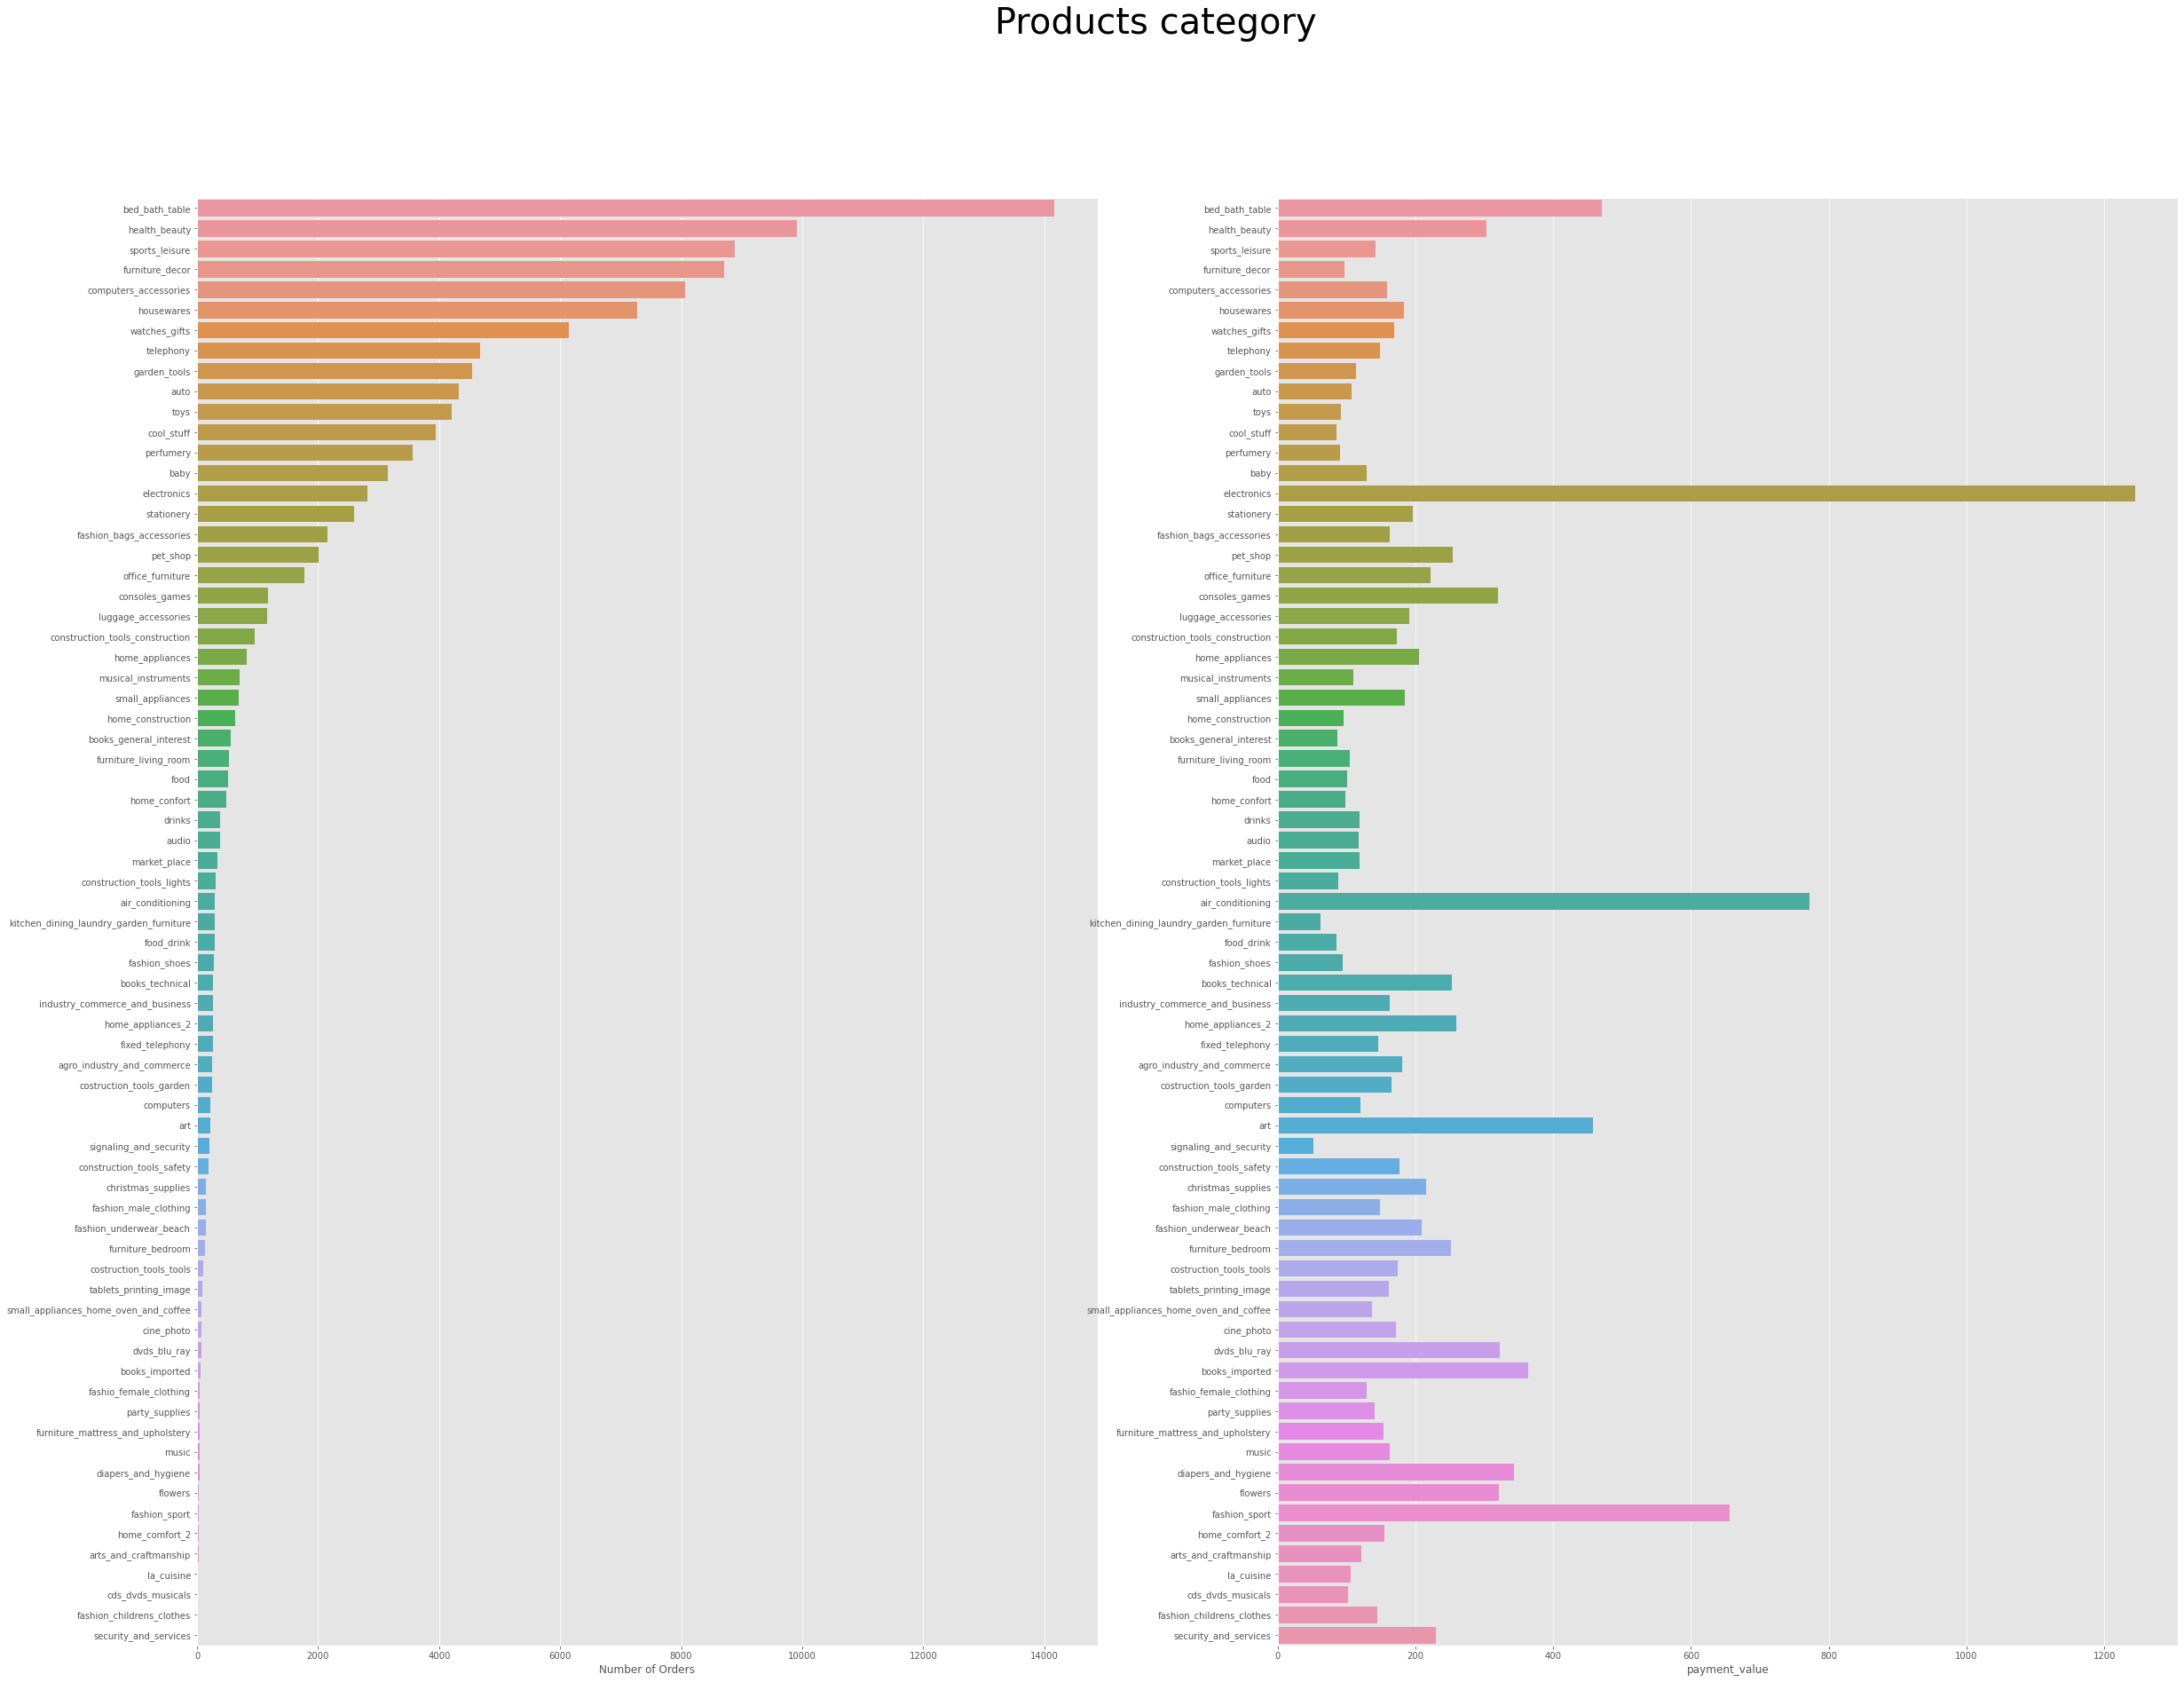

In [96]:
# Nombre de produits par catégorie de produits
products_count = df['product_category_name'].value_counts()

# Payement moyen pour chaque catégorie de produits
products_value = df.groupby("product_category_name")["payment_value"].mean()

# Liste des catégories
y = list(products_count.index)

fig = plt.figure(1, figsize=(40, 30))
# Nombre de produits achetés par catégorie
plt.subplot(121)
sns.barplot(products_count.values, y)
plt.xlabel("Number of Orders")

# Payement moyen par catégorie de produits
plt.subplot(122)
sns.barplot(products_value, y)
fig.suptitle("Products category", fontsize=40)
plt.show()

In [98]:
df.to_csv('data_cleaned.csv')